In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/home/admin1/Documents/score.csv")
df

,Hours,Scores
0,1.0,45
1,2.0,68
2,3.0,23
3,4.5,88
4,3.9,90
5,2.5,12
6,8.0,34
7,12.0,74
8,6.4,56


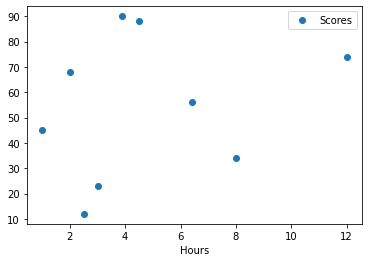

In [3]:
df.plot(x="Hours",y="Scores",style="o")
plt.show()

In [4]:
x_mean = df["Hours"].mean()
y_mean = df["Scores"].mean()
print(x_mean, y_mean)

4.811111111111111 54.44444444444444


In [5]:
df["x"] = df["Hours"] - x_mean
df["y"] = df["Scores"] - y_mean
df["x*y"] = df["x"] * df["y"]
df["x^2"] = df["x"]**2
df["y^2"] = df["y"]**2
df

,Hours,Scores,x,y,x*y,x^2,y^2
0,1.0,45,-3.811111,-9.444444,35.993827,14.524568,89.197531
1,2.0,68,-2.811111,13.555556,-38.106173,7.902346,183.753086
2,3.0,23,-1.811111,-31.444444,56.949383,3.280123,988.753086
3,4.5,88,-0.311111,33.555556,-10.439506,0.096790,1125.975309
4,3.9,90,-0.911111,35.555556,-32.395062,0.830123,1264.197531
5,2.5,12,-2.311111,-42.444444,98.093827,5.341235,1801.530864
6,8.0,34,3.188889,-20.444444,-65.195062,10.169012,417.975309
7,12.0,74,7.188889,19.555556,140.582716,51.680123,382.419753
8,6.4,56,1.588889,1.555556,2.471605,2.524568,2.419753


In [6]:
summation_x_y = df["x*y"].sum()
summation_x_squared = df["x^2"].sum()
summation_y_squared = df["y^2"].sum()
print(summation_x_y, summation_x_squared, summation_y_squared)

187.95555555555555 96.3488888888889 6256.222222222222


In [7]:
correlation = summation_x_y / (summation_x_squared * summation_y_squared) ** 0.5
correlation

0.24208937455951093

In [8]:
def getMean(numbers):
    if len(numbers) == 0:
        return None
    else:
        current_sum = 0
        for i in numbers:
            current_sum += i
            current_avg = current_sum/len(numbers)
        return current_avg


def getStandardDeviation(numbers):
    if len(numbers) == 0:
        return 0
    else:
        mean = getMean(numbers)
        std_deviation = 0
        for i in numbers:
            std_deviation += (i-mean)**2
        return (std_deviation/len(numbers))**0.5
    
std_deviation_x = getStandardDeviation(df["x"].tolist())
std_deviation_y = getStandardDeviation(df["y"].tolist())
print(std_deviation_x, std_deviation_y)

3.2719156619273413 26.36542816775665


In [9]:
m = correlation * (std_deviation_y / std_deviation_x)
m

1.950780727448855

In [10]:
c = df["Scores"].mean() - m * df["Hours"].mean()
c

45.05902161127384

In [11]:
df["y_pred"] = m * df["Hours"]+c
df

,Hours,Scores,x,y,x*y,x^2,y^2,y_pred
0,1.0,45,-3.811111,-9.444444,35.993827,14.524568,89.197531,47.009802
1,2.0,68,-2.811111,13.555556,-38.106173,7.902346,183.753086,48.960583
2,3.0,23,-1.811111,-31.444444,56.949383,3.280123,988.753086,50.911364
3,4.5,88,-0.311111,33.555556,-10.439506,0.096790,1125.975309,53.837535
4,3.9,90,-0.911111,35.555556,-32.395062,0.830123,1264.197531,52.667066
5,2.5,12,-2.311111,-42.444444,98.093827,5.341235,1801.530864,49.935973
6,8.0,34,3.188889,-20.444444,-65.195062,10.169012,417.975309,60.665267
7,12.0,74,7.188889,19.555556,140.582716,51.680123,382.419753,68.468390
8,6.4,56,1.588889,1.555556,2.471605,2.524568,2.419753,57.544018


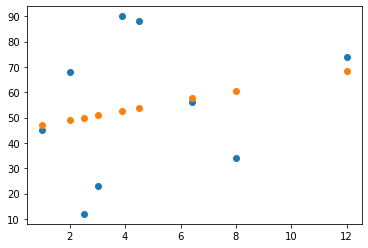

In [12]:
plot1 = plt.scatter(df["Hours"],df["Scores"])
plot2 = plt.scatter(df["Hours"],df["y_pred"])
plt.show()